<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Seminars/Solutions/S4s_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оновные алгоритмы ML

### Семинар 4. Метод опорных векторов (SVM)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Метод опорных векторов (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Maximum margin classifier (C = inf)

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Обучим классификатор с бесконечным штрафом за неправильную классификацию

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf)
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [ ]:
# handson-ml course
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

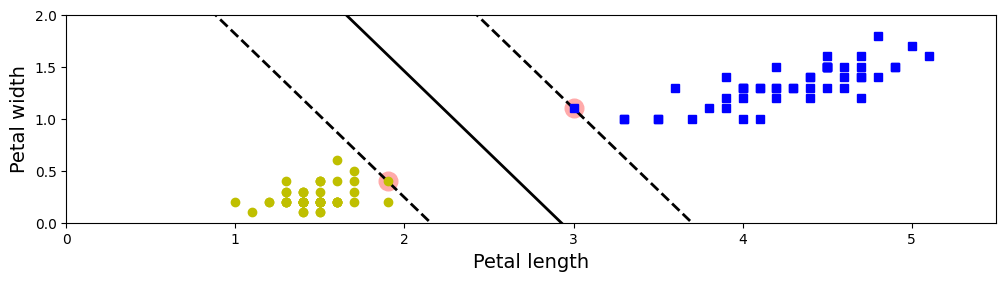

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Подпишите на графике опорные вектора. Что они собой представляют?

In [ ]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

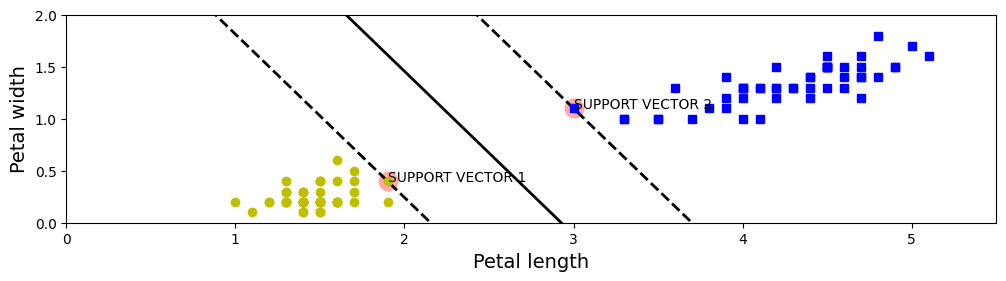

In [ ]:
plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.text(1.9, 0.4, 'SUPPORT VECTOR 1')
plt.text(3, 1.1, 'SUPPORT VECTOR 2')
plt.axis([0, 5.5, 0, 2])
plt.show()

Добавим один выброс

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf)
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf.fit(X_out, y_out)

SVC(C=inf, kernel='linear')

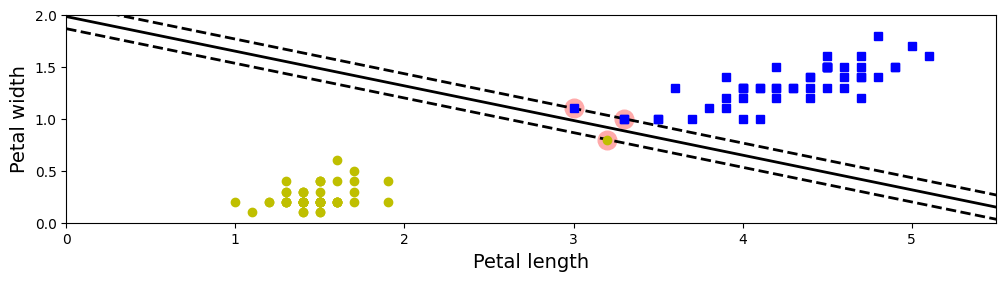

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Объясните, почему полученное решение плохое.

Теперь добавим другой выброс

In [ ]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

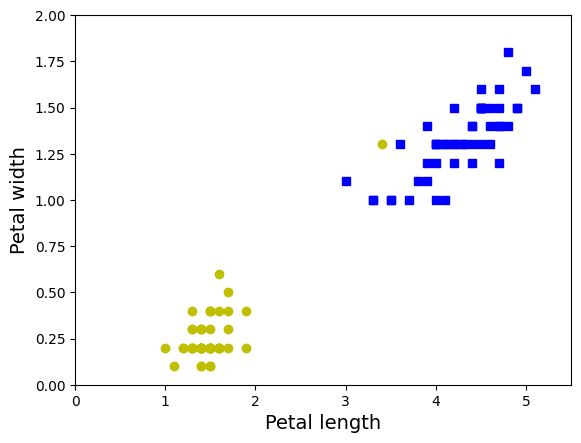

In [ ]:
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Объясните, почему ниже расположенная строчка кода приводит к зависанию

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf)
svm_clf.fit(X_out, y_out)

## Чувствительность к масштабу признаков

[[ 1. 50.]
 [ 5. 60.]]
[[-1.50755672 -0.11547005]
 [ 0.90453403 -1.5011107 ]
 [ 0.90453403  0.34641016]]


(-2.0, 2.0, -2.0, 2.0)

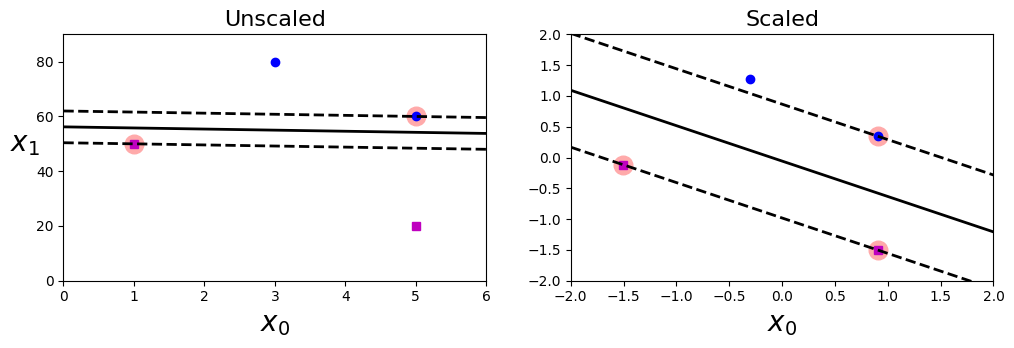

In [ ]:
# handson-ml course

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)
print(svm_clf.support_vectors_)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
print(svm_clf.support_vectors_)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

Чувствителен ли SVM к масштабу признаков?

In [ ]:
# да, мы видим как минимум другое количество опорных векторов

Какой еще алгоритм из разобранных ранее крайне чувствителен к масштабу признаков?

In [ ]:
# в целом все

## Разные значения C

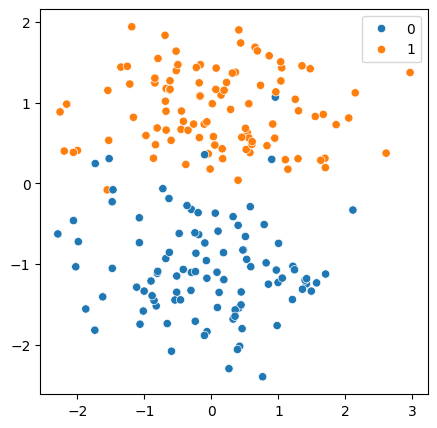

In [ ]:
X, Y = datasets.make_classification(n_features=2,
                                       n_redundant=0,
                                       n_informative=1,
                                       random_state=202,
                                       n_clusters_per_class=1,
                                       flip_y=0,
                                       n_samples=200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x=X[:, 1], y=X[:, 0], hue=Y)
plt.show()

Продемонстрируйте (при помощи графиков и используя датасет, сгенерированный в предыдущей ячейке), как меняется граница решений для kernel="linear" в зависимости от значения C

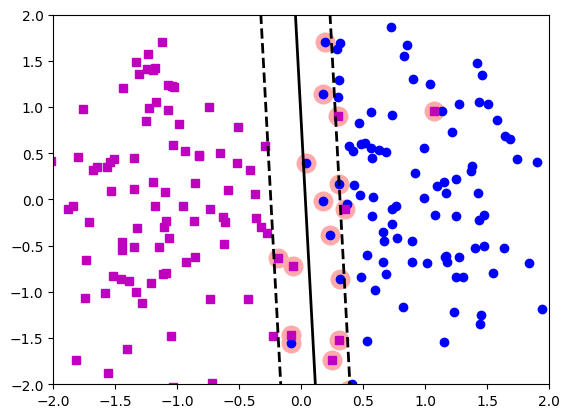

In [ ]:
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(X, Y)
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(svm_clf, -2, 2)

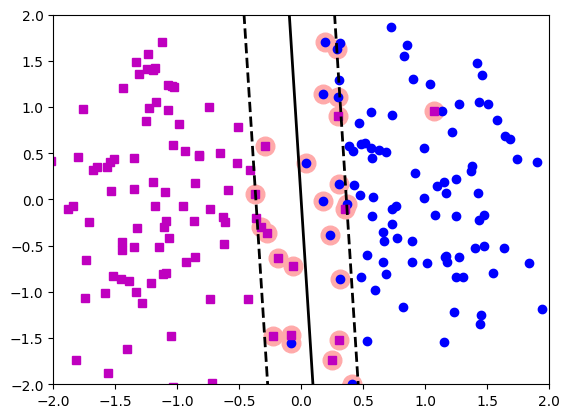

In [ ]:
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, Y)
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(svm_clf, -2, 2)

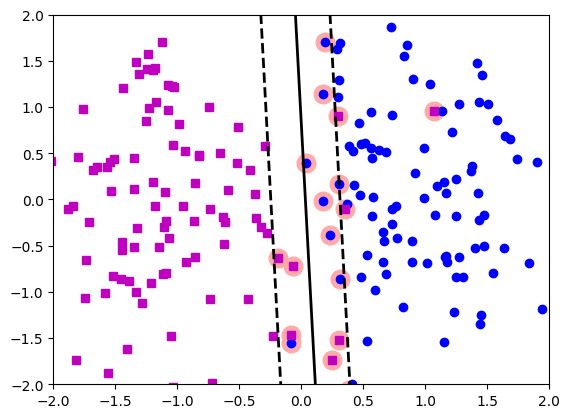

In [ ]:
svm_clf = SVC(kernel="linear", C=1000)
svm_clf.fit(X, Y)
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(svm_clf, -2, 2)

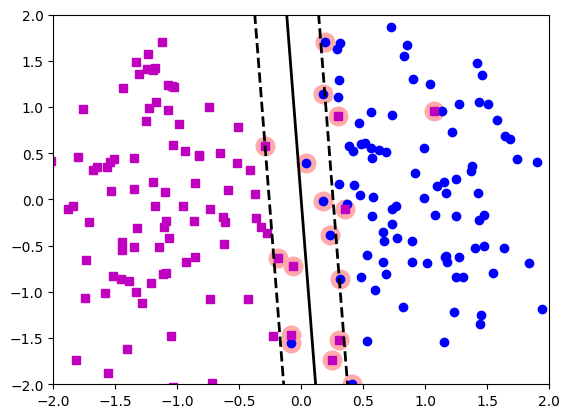

In [ ]:
svm_clf = SVC(kernel="linear", C=1000000)
svm_clf.fit(X, Y)
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(svm_clf, -2, 2)

Как связан bias-variance trade-off с значением параметра C

In [ ]:
# больше С, больше bias-variance, тем больше мы будем стремиться, чтобы ни одна точка не упала в зазор (margin)

## Разные ядра

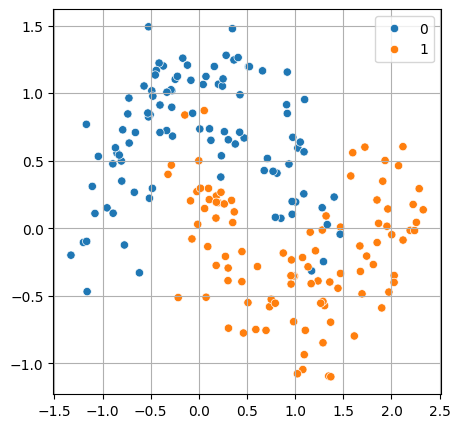

In [ ]:
X, Y = datasets.make_moons(n_samples=200,
                           noise=0.25,
                           random_state=200)
plt.figure(figsize=(5,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)
plt.grid(True, which='both')
plt.show()

In [ ]:
# handson-ml course

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 500)
    x1s = np.linspace(axes[2], axes[3], 500)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

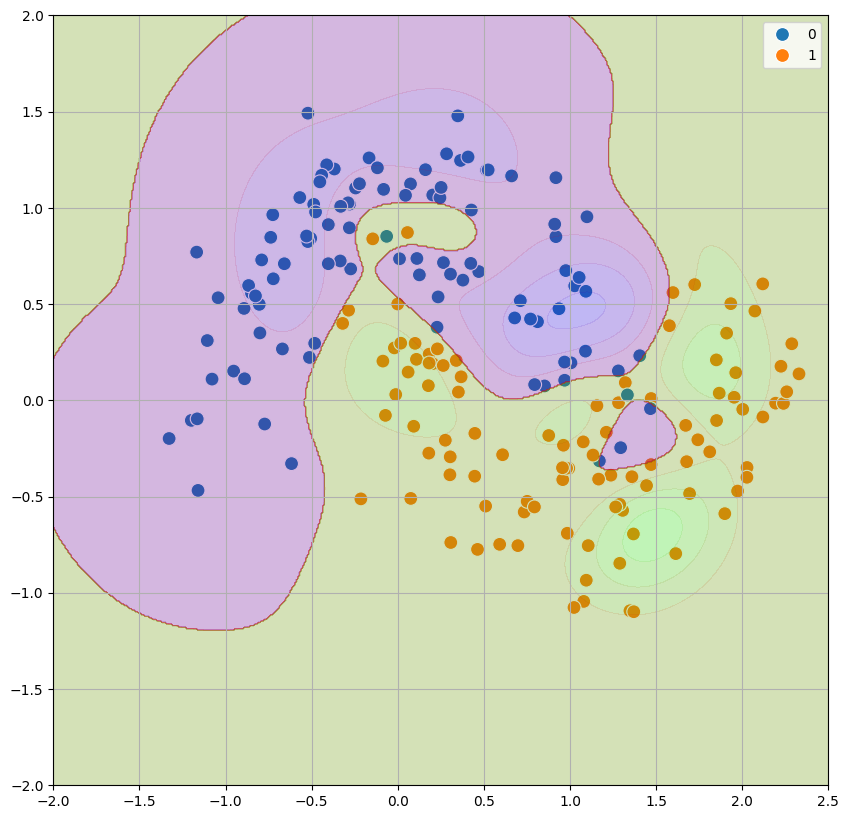

In [ ]:
svm = SVC(kernel="rbf", gamma=5, C=1000)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

Постройте decision border для kernel="poly" для значений degree 3, 5, 10 и 20. C поставьте равным 10

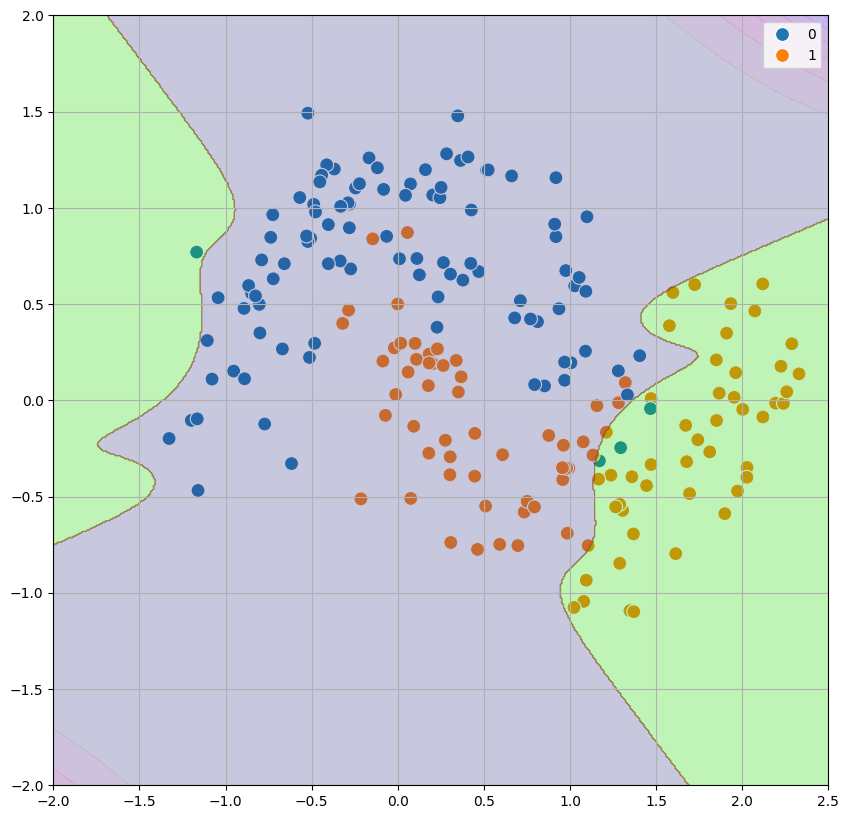

In [ ]:
svm = SVC(kernel="poly", degree=10, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

Используя построенные графики скажите, какая степень полинома дает лучшее решение?  

Как думаете, будет ли зависеть потребление памяти моделью от степени полинома?

Проверьте свои догадки при помощи функции memit jupyter-notebook https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

In [ ]:
pip install memory_profiler

In [ ]:
%load_ext memory_profiler

In [ ]:
%%memit

svm = SVC(kernel="poly", degree=3, C=10)
svm.fit(X, Y)

peak memory: 284.90 MiB, increment: 0.20 MiB


In [ ]:
%%memit

svm = SVC(kernel="poly", degree=20, C=10)
svm.fit(X, Y)

peak memory: 277.21 MiB, increment: 0.30 MiB


Постройте decision border для kernel="rbf" для значений gamma=0.1, 3 и 0.5 и C =0.001, 1000.

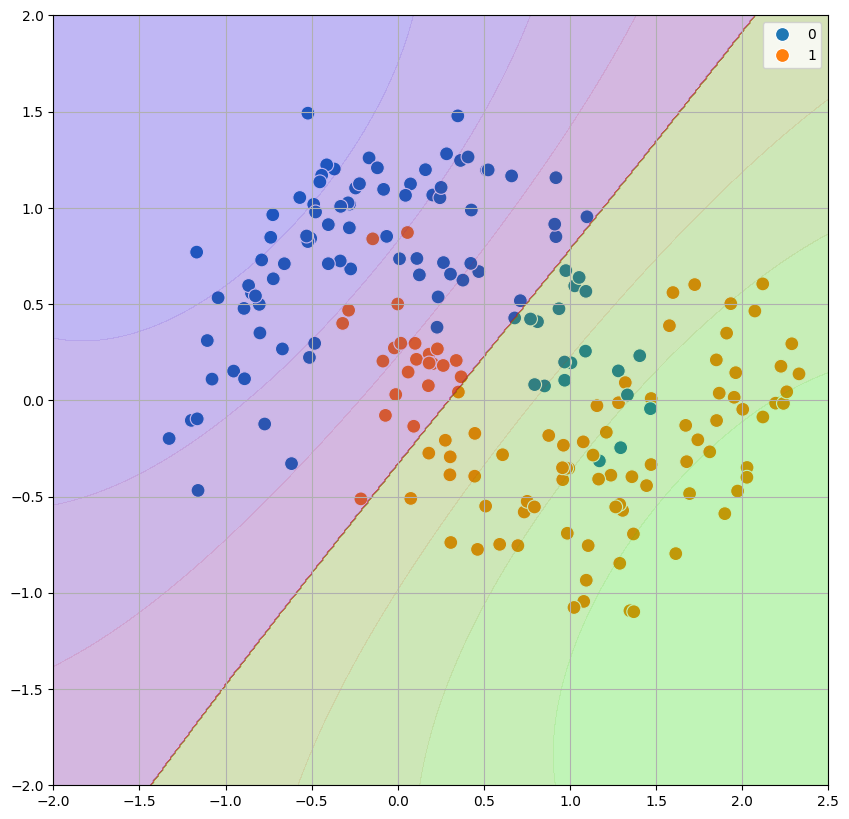

In [ ]:
svm = SVC(kernel="rbf", gamma=0.1, C=0.001)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

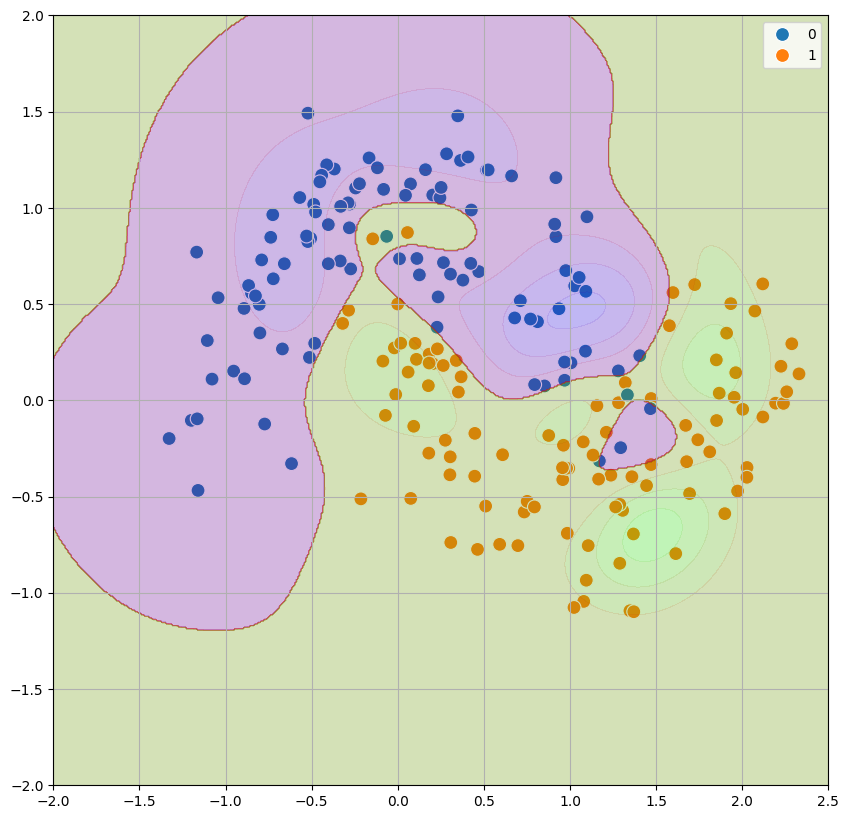

In [ ]:
svm = SVC(kernel="rbf", gamma=5, C=1000)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

#### Дополнительно

На рисунке, который вы получите для gamma=5, C=1000, есть области, в которых нет никаких точек.

Эти области "явно" расположены ближе к синим точкам, чем к желтым.

Однако, по какой-то причине, модель в этих областях принимает решение не в пользу синих точек.

Почитайте подробнее про то, как устроено ядро rbf и попытайтесь объяснить наблюдаемый феномен